# Exercise

Write a python macro ExerciseHist.py.

Open the Zmumu.root file and load the tree called physics.

Create two histograms with 40 bins ranging from 0 to 0.2 GeV to plot the muon masses.

Fill the histograms with leading and subleading muon mass from branches lep1_m and lep2_m.

Calculate the mean values and RMSs.

Calculate the integrals.

## Bonus questions:

Are the integrals the same and why?
Write the histogram to a file.

In [1]:
import sys
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install mplhep
!{sys.executable} -m pip install uproot
!{sys.executable} -m pip install scipy

In [12]:
import matplotlib.pyplot as plt
import uproot
import numpy as np
import awkward as ak
import mplhep as hep
from scipy.optimize import curve_fit

## Open the Zmumu.root file and load the tree called physics.

In [13]:
tree=uproot.open("Zmumu.root")["physics"]
print(tree)
branches=tree.arrays()
print(branches)
branches_dict=branches.to_list()
print(branches_dict)

<TTree '' (15 branches) at 0x0002f994a7d0>
[{lep1_pt: 59.9, lep1_eta: -2.18, lep1_phi: -1.42, lep1_E: 268, ...}, ...]


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [14]:
lep1_m=branches["lep1_m"]
lep2_m=branches["lep2_m"]

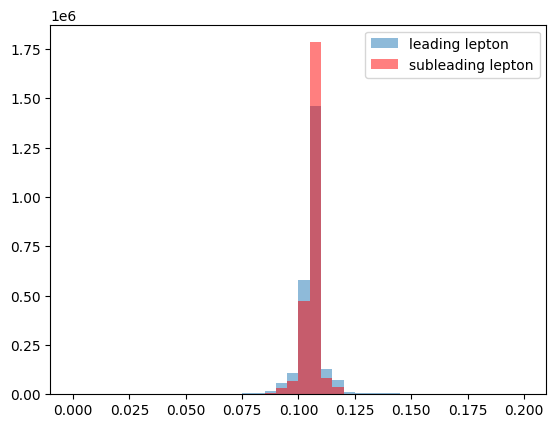

In [19]:
plt.hist(lep1_m, bins=40, range=(0, 0.2), alpha=0.5, label="leading lepton")
plt.hist(lep2_m, bins=40, range=(0, 0.2), color="r", alpha=0.5, label="subleading lepton")
plt.legend()


## Bonus: (beautifying using hep/root style)

(exptext: Custom Text(0.05, 0.95, 'ATLAS'),
 expsuffix: Custom Text(0.05, 0.955, 'Simulation Example'),
 expsuffix: Custom Text(0.05, 0.95, '$\\sqrt{s} = \\mathrm{13\\ TeV}$'))

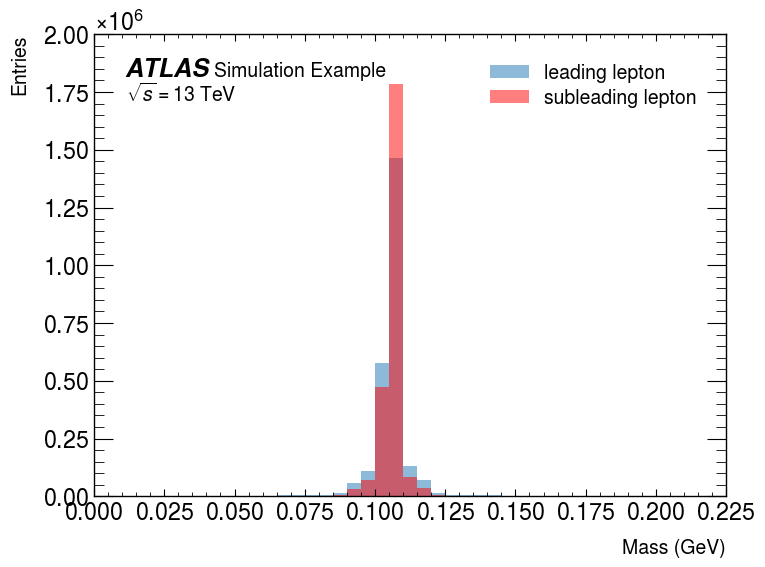

In [55]:
hep.style.use(hep.style.ATLAS)
fig, ax = plt.subplots()
plt.hist(lep1_m, bins=40, range=(0, 0.2), alpha=0.5, label="leading lepton")
plt.hist(lep2_m, bins=40, range=(0, 0.2), color="r", alpha=0.5, label="subleading lepton")
plt.legend()
ax.set_xlabel("Mass (GeV)")
ax.set_ylabel("Entries")
hep.atlas.label("Example")

## Calculate mean values

In [56]:
print("lep1 mass mean: %.3f"%np.mean(lep1_m))
print("lep2 mass mean: %.3f"%np.mean(lep2_m))

lep1 mass mean: 0.106
lep2 mass mean: 0.107


## Calculate RMS

In [57]:
print("lep1 mass rms: %.3f"%np.sqrt(np.mean(np.square(lep1_m))))
print("lep2 mass rms: %.3f"%np.sqrt(np.mean(np.square(lep2_m))))

lep1 mass rms: 0.107
lep2 mass rms: 0.106


## Calculate integral

In [53]:
print("lep1 mass integral: %.1f"%np.sum(lep1_m))
print("lep2 mass integral: %.1f"%np.sum(lep2_m))

lep1 mass integral:  266019.06
lep2 mass integral:  266833.34
